<a href="https://colab.research.google.com/github/amit986745/Football-Analytics/blob/main/comparison_of_two_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messi vs Neymar - Answere for Football Fans

## Flow of the Notebook:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
2. Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
3. Comparative Analysis
4. Shot Analysis
5. The Final comparison

In [ ]:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

# Scrape the Data

## Neymar

### Season-wise data

In [ ]:
# Scrape Neymar player stats:
cris_scrape_url = "https://understat.com/player/2099"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Neymar_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
Neymar_season_wise_meta_df.insert(0, "Player", "Neymar")

In [ ]:
Neymar_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Neymar,FWL,1,1,2,90,0.19465672969818115,3,1.5165148973464966,6,2022,Paris Saint Germain,0,0,1,0.19465672969818115,1.3416728973388672,0.4155452251434326
1,Neymar,FWL,22,13,54,1877,11.735738722607493,6,8.739590998739004,61,2021,Paris Saint Germain,10,0,10,8.695358294993639,25.085922837257385,12.037467360496521
2,Neymar,FWL,18,9,70,1413,13.246887736022472,5,7.517837218940258,58,2020,Paris Saint Germain,5,2,4,8.68631674349308,21.53813226521015,9.847284222021699
3,Neymar,AMC,15,12,70,1325,14.72513022273779,6,5.2460290137678385,38,2019,Paris Saint Germain,2,1,8,10.924720011651516,21.302691847085953,7.206128515303135
4,Neymar,FW,17,15,55,1443,11.89575806260109,7,7.784678146243095,43,2018,Paris Saint Germain,2,0,10,8.095414076000452,18.16519955545664,6.617414951324463
5,Neymar,FWL,20,19,91,1797,16.537796266376972,13,12.280967645347118,70,2017,Paris Saint Germain,4,1,15,13.497415743768215,31.42876945436001,11.52315479516983
6,Neymar,FWL,30,13,105,2652,14.175591252744198,11,10.670383967459202,91,2016,Barcelona,6,1,12,13.432441525161266,30.410841055214405,12.350060816854239
7,Neymar,FWL,34,24,124,3058,28.050516739487648,12,18.07445504516363,102,2015,Barcelona,6,0,19,22.847829207777977,52.40943560004234,22.224826822057366
8,Neymar,Sub,33,22,95,2573,22.721617586910725,7,8.261543160304427,52,2014,Barcelona,6,0,21,21.978339917957783,36.88822028413415,11.678407426923513


### Shots Data

In [ ]:
# Scrape Neymar shot data
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Neymar_shots_df = pd.json_normalize(json.loads(json_data))
Neymar_shots_df.insert(0, "Player", "Neymar")

In [ ]:
Neymar_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Neymar,32781,67,BlockedShot,0.9769999694824218,0.51,0.7905658483505249,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,None
1,Neymar,32783,70,MissedShots,0.899000015258789,0.53,0.3156721889972687,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Cross
2,Neymar,32796,88,MissedShots,0.9269999694824219,0.534000015258789,0.08591074496507645,Neymar,a,2099,...,2014,Head,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Aerial
3,Neymar,33020,66,MissedShots,0.8080000305175781,0.68,0.04794665053486824,Neymar,h,2099,...,2014,RightFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Pedro,Pass
4,Neymar,33021,78,Goal,0.88,0.59,0.3403613269329071,Neymar,h,2099,...,2014,LeftFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Lionel Messi,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Neymar,477598,30,Goal,0.94,0.48400001525878905,0.5202987790107727,Neymar,h,2099,...,2021,RightFoot,18197,Paris Saint Germain,Metz,5,0,2022-05-21 19:00:00,None,Dispossessed
662,Neymar,477600,39,MissedShots,0.860999984741211,0.759000015258789,0.06665343046188354,Neymar,h,2099,...,2021,LeftFoot,18197,Paris Saint Germain,Metz,5,0,2022-05-21 19:00:00,Ángel Di María,Chipped
663,Neymar,477606,51,BlockedShot,0.9069999694824219,0.6079999923706054,0.4607050120830536,Neymar,h,2099,...,2021,RightFoot,18197,Paris Saint Germain,Metz,5,0,2022-05-21 19:00:00,Kylian Mbappe-Lottin,Pass
664,Neymar,479505,6,BlockedShot,0.9119999694824219,0.495,0.11321144551038742,Neymar,a,2099,...,2022,RightFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Achraf Hakimi,Cross


## Messi

### Season-wise data

In [ ]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
Messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
Messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,FW,1,2,6,90,1.9920172691345215,1,0.9150597453117371,4,2022,Paris Saint Germain,0,0,2,1.9920172691345215,2.9200479984283447,0.606464147567749
1,Messi,Sub,26,6,89,2155,9.8803666010499,13,8.680599307641387,63,2021,Paris Saint Germain,0,0,6,9.8803666010499,27.21942439675331,13.841107498854399
2,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
3,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
4,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
5,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
6,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
7,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
8,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


### Shots Data

In [ ]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Messi_shots_df = pd.json_normalize(json.loads(json_data))
Messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
Messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,...,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,...,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Messi,479516,49,BlockedShot,0.7630000305175781,0.5,0.07970426976680756,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,None,Standard
1335,Messi,479522,68,MissedShots,0.8869999694824219,0.6220000076293946,0.11598747223615646,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Nuno Mendes,Pass
1336,Messi,479524,79,Goal,0.9159999847412109,0.5279999923706055,0.6018829345703125,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Neymar,Pass
1337,Messi,479526,85,Goal,0.9159999847412109,0.49599998474121093,0.5788136124610901,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Leandro Paredes,Throughball


## Build Final Season-level and shots data

### Joint Season-wise Data

In [ ]:
season_wise_meta_df = Neymar_season_wise_meta_df.append(Messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Neymar,FWL,1,1,2,90,0.19465672969818115,3,1.5165148973464966,6,2022,Paris Saint Germain,0,0,1,0.19465672969818115,1.3416728973388672,0.4155452251434326
1,Neymar,FWL,22,13,54,1877,11.735738722607493,6,8.739590998739004,61,2021,Paris Saint Germain,10,0,10,8.695358294993639,25.085922837257385,12.037467360496521
2,Neymar,FWL,18,9,70,1413,13.246887736022472,5,7.517837218940258,58,2020,Paris Saint Germain,5,2,4,8.68631674349308,21.53813226521015,9.847284222021699
3,Neymar,AMC,15,12,70,1325,14.72513022273779,6,5.2460290137678385,38,2019,Paris Saint Germain,2,1,8,10.924720011651516,21.302691847085953,7.206128515303135
4,Neymar,FW,17,15,55,1443,11.89575806260109,7,7.784678146243095,43,2018,Paris Saint Germain,2,0,10,8.095414076000452,18.16519955545664,6.617414951324463
5,Neymar,FWL,20,19,91,1797,16.537796266376972,13,12.280967645347118,70,2017,Paris Saint Germain,4,1,15,13.497415743768215,31.42876945436001,11.52315479516983
6,Neymar,FWL,30,13,105,2652,14.175591252744198,11,10.670383967459202,91,2016,Barcelona,6,1,12,13.432441525161266,30.410841055214405,12.350060816854239
7,Neymar,FWL,34,24,124,3058,28.050516739487648,12,18.07445504516363,102,2015,Barcelona,6,0,19,22.847829207777977,52.40943560004234,22.224826822057366
8,Neymar,Sub,33,22,95,2573,22.721617586910725,7,8.261543160304427,52,2014,Barcelona,6,0,21,21.978339917957783,36.88822028413415,11.678407426923513
0,Messi,FW,1,2,6,90,1.9920172691345215,1,0.9150597453117371,4,2022,Paris Saint Germain,0,0,2,1.9920172691345215,2.9200479984283447,0.606464147567749


### Joint Shots Data

In [ ]:
shots_df = Neymar_shots_df.append(Messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Neymar,32781,67,BlockedShot,0.9769999694824218,0.51,0.7905658483505249,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,None
1,Neymar,32783,70,MissedShots,0.899000015258789,0.53,0.3156721889972687,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Cross
2,Neymar,32796,88,MissedShots,0.9269999694824219,0.534000015258789,0.08591074496507645,Neymar,a,2099,...,2014,Head,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Aerial
3,Neymar,33020,66,MissedShots,0.8080000305175781,0.68,0.04794665053486824,Neymar,h,2099,...,2014,RightFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Pedro,Pass
4,Neymar,33021,78,Goal,0.88,0.59,0.3403613269329071,Neymar,h,2099,...,2014,LeftFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Lionel Messi,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Messi,479516,49,BlockedShot,0.7630000305175781,0.5,0.07970426976680756,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,None,Standard
1335,Messi,479522,68,MissedShots,0.8869999694824219,0.6220000076293946,0.11598747223615646,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Nuno Mendes,Pass
1336,Messi,479524,79,Goal,0.9159999847412109,0.5279999923706055,0.6018829345703125,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Neymar,Pass
1337,Messi,479526,85,Goal,0.9159999847412109,0.49599998474121093,0.5788136124610901,Lionel Messi,a,2097,...,2022,LeftFoot,19650,Clermont Foot,Paris Saint Germain,0,5,2022-08-06 19:00:00,Leandro Paredes,Throughball


In [ ]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,...,2005,2005,2005,2005,2005,2005,2005,2005,1311,2005
unique,2,2005,98,5,290,449,1936,2,2,2,...,9,4,346,54,54,10,8,343,83,20
top,Messi,32781,50,MissedShots,0.885,0.5,0.7432776093482971,Lionel Messi,h,2097,...,2017,LeftFoot,4003,Barcelona,Barcelona,1,1,2017-03-19 19:45:00,Luis Suárez,Pass
freq,1339,1,33,545,88,80,42,1339,1112,1339,...,287,1317,15,872,696,451,595,15,180,803


# Data Cleaning and EDA

## On Season-wise data

### Numerical EDA

In [ ]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 8
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      18 non-null     object
 1   position    18 non-null     object
 2   games       18 non-null     object
 3   goals       18 non-null     object
 4   shots       18 non-null     object
 5   time        18 non-null     object
 6   xG          18 non-null     object
 7   assists     18 non-null     object
 8   xA          18 non-null     object
 9   key_passes  18 non-null     object
 10  season      18 non-null     object
 11  team        18 non-null     object
 12  yellow      18 non-null     object
 13  red         18 non-null     object
 14  npg         18 non-null     object
 15  npxG        18 non-null     object
 16  xGChain     18 non-null     object
 17  xGBuildup   18 non-null     object
dtypes: object(18)
memory usage: 2.7+ KB


In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Neymar,FWL,1,1,2,90,0.194657,3,1.516515,6,2022,Paris Saint Germain,0,0,1,0.194657,1.341673,0.415545
1,Neymar,FWL,22,13,54,1877,11.735739,6,8.739591,61,2021,Paris Saint Germain,10,0,10,8.695358,25.085923,12.037467
2,Neymar,FWL,18,9,70,1413,13.246888,5,7.517837,58,2020,Paris Saint Germain,5,2,4,8.686317,21.538132,9.847284
3,Neymar,AMC,15,12,70,1325,14.725130,6,5.246029,38,2019,Paris Saint Germain,2,1,8,10.924720,21.302692,7.206129
4,Neymar,FW,17,15,55,1443,11.895758,7,7.784678,43,2018,Paris Saint Germain,2,0,10,8.095414,18.165200,6.617415
5,Neymar,FWL,20,19,91,1797,16.537796,13,12.280968,70,2017,Paris Saint Germain,4,1,15,13.497416,31.428769,11.523155
6,Neymar,FWL,30,13,105,2652,14.175591,11,10.670384,91,2016,Barcelona,6,1,12,13.432442,30.410841,12.350061
7,Neymar,FWL,34,24,124,3058,28.050517,12,18.074455,102,2015,Barcelona,6,0,19,22.847829,52.409436,22.224827
8,Neymar,Sub,33,22,95,2573,22.721618,7,8.261543,52,2014,Barcelona,6,0,21,21.978340,36.888220,11.678407
0,Messi,FW,1,2,6,90,1.992017,1,0.915060,4,2022,Paris Saint Germain,0,0,2,1.992017,2.920048,0.606464


In [ ]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [ ]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,25.6,20.4,111.4,2166.5,18.8,10.1,10.9,65.8,2018.0,3.8,0.3,17.3,15.8,31.5,12.6
std,11.5,12.5,62.6,977.9,9.8,5.1,5.2,28.6,2.7,2.6,0.6,11.5,8.6,14.9,6.4
min,1.0,1.0,2.0,90.0,0.2,1.0,0.9,4.0,2014.0,0.0,0.0,1.0,0.2,1.3,0.4
25%,18.5,12.2,70.0,1531.5,12.2,6.2,7.9,53.5,2016.0,2.2,0.0,8.5,9.0,22.4,10.1
50%,31.5,20.5,100.0,2612.5,18.7,10.0,11.0,73.5,2018.0,4.0,0.0,17.0,15.3,33.2,12.2
75%,34.0,29.0,167.2,2865.0,26.8,13.0,15.3,87.8,2020.0,5.8,0.0,26.0,22.2,41.1,17.4
max,38.0,43.0,196.0,3374.0,35.9,20.0,18.1,102.0,2022.0,10.0,2.0,38.0,31.4,54.8,22.2


In [ ]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                                          goals        ...  \
       count  mean   std  min   25%   50%   75%   max count  mean  ...   
Player                                                             ...   
Messi    9.0  30.0  11.4  1.0  33.0  34.0  35.0  38.0   9.0  26.6  ...   
Neymar   9.0  21.1  10.3  1.0  17.0  20.0  30.0  34.0   9.0  14.2  ...   

       xGChain       xGBuildup                                          
           75%   max     count  mean  std  min   25%   50%   75%   max  
Player                                                                  
Messi     42.5  54.8       9.0  14.9  6.5  0.6  13.5  15.2  19.8  21.6  
Neymar    31.4  52.4       9.0  10.4  5.8  0.4   7.2  11.5  12.0  22.2  

[2 rows x 120 columns]

In [ ]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player  team               
Messi   Barcelona              231
        Paris Saint Germain      8
Neymar  Barcelona               59
        Paris Saint Germain     69
Name: goals, dtype: int64

### Visual EDA

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [ ]:
num_cols.__len__()

15

In [ ]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Messi,270,239,1339,22769,204.23,111,115.49,663,18162,27,0,211,175.22,328.89,133.75
Neymar,190,128,666,16228,133.30,70,80.09,521,18162,41,5,100,108.36,238.58,93.91


In [ ]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

In [ ]:
total_df.head()

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,270,239,1339,22769,204.2,111,115.5,663,18162,27,0,211,175.2,328.9,133.8
1,Neymar,190,128,666,16228,133.3,70,80.1,521,18162,41,5,100,108.4,238.6,93.9


#### EDA on Totals (Consolidated data for all seasons per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4, shared_xaxes=False, vertical_spacing=0.1, subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
  fig.add_trace(go.Bar(x=total_df["Player"], y=total_df[col], text=total_df[col], textposition="inside", name=col), row=i, col=j)
  j += 1
  if j > 4:
    j = 1
    i += 1
  if i > 4:
    i = 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\

xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\

xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

#### EDA on Season-wise stats (Consolidated data per season per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4, shared_xaxes=False, vertical_spacing=0.1, subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots
for col in num_cols:        
  fig.add_trace(go.Bar(x=season_wise_meta_df["season"], y=season_wise_meta_df[col],
                      text=season_wise_meta_df[col], textposition="inside", name=col), row=i, col=j)
  j += 1
  if j > 4:
    j = 1
    i += 1
  if i > 4:
    i = 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots data

### Numerical EDA

In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 1338
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2005 non-null   object
 1   id               2005 non-null   object
 2   minute           2005 non-null   object
 3   result           2005 non-null   object
 4   X                2005 non-null   object
 5   Y                2005 non-null   object
 6   xG               2005 non-null   object
 7   player           2005 non-null   object
 8   h_a              2005 non-null   object
 9   player_id        2005 non-null   object
 10  situation        2005 non-null   object
 11  season           2005 non-null   object
 12  shotType         2005 non-null   object
 13  match_id         2005 non-null   object
 14  h_team           2005 non-null   object
 15  a_team           2005 non-null   object
 16  h_goals          2005 non-null   object
 17  a_goals          2005 non-null   

In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
shots_df = shots_df.round(2)

In [ ]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2005.0,2005.0,2005.0,2005.0,2005.0,2005.0,2005.0,2005.0,2005.0,2005.0
mean,220670.3,49.5,0.8,0.5,0.2,2097.7,2017.2,8621.5,2.2,1.5
std,138263.8,25.8,0.1,0.1,0.2,0.9,2.2,5168.5,1.9,1.6
min,32522.0,0.0,0.6,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
25%,91085.0,28.0,0.8,0.5,0.0,2097.0,2015.0,4022.0,1.0,0.0
50%,184646.0,50.0,0.9,0.5,0.1,2097.0,2017.0,8167.0,2.0,1.0
75%,357441.0,71.0,0.9,0.6,0.1,2099.0,2019.0,12380.0,3.0,2.0
max,479528.0,97.0,1.0,1.0,1.0,2099.0,2022.0,19650.0,9.0,8.0


In [ ]:
shots_df.groupby(["Player"]).describe().round(1)

id                                                            \
         count      mean       std      min      25%       50%       75%   
Player                                                                     
Messi   1339.0  228472.4  138004.1  32522.0  92487.0  198454.0  365132.0   
Neymar   666.0  204984.0  137553.7  32781.0  88664.2  162441.0  335143.8   

                  minute        ... h_goals      a_goals                      \
             max   count  mean  ...     75%  max   count mean  std  min  25%   
Player                          ...                                            
Messi   479528.0  1339.0  49.8  ...     3.0  8.0  1339.0  1.5  1.5  0.0  0.0   
Neymar  479506.0   666.0  49.0  ...     4.0  9.0   666.0  1.6  1.6  0.0  0.0   

                       
        50%  75%  max  
Player                 
Messi   1.0  2.0  8.0  
Neymar  1.0  2.0  8.0  

[2 rows x 80 columns]

In [ ]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                                                   \
               count      mean      std       min       25%       50%   
Player season                                                           
Messi  2014    187.0   36952.0   2531.3   32522.0   34907.0   36893.0   
       2015    158.0   88863.3   2656.8   84059.0   87051.0   88943.0   
       2016    179.0  139806.3   2646.0  135275.0  137397.5  139881.0   
       2017    196.0  185971.0  15797.6  169196.0  171047.5  184643.5   
       2018    170.0  268467.5  24721.2  218406.0  259132.2  280689.5   
       2019    159.0  353540.5  15654.1  320830.0  337638.0  357442.0   
       2020    195.0  401267.9  12859.0  379833.0  391496.5  397649.0   
       2021     89.0  455300.2  14076.4  432204.0  444440.0  456395.0   
       2022      6.0  479521.8      5.3  479515.0  479517.5  479523.0   
Neymar 2014     95.0   36884.9   2485.4   32781.0   35354.5   36444.0   
       2015    124.0   88060.1   2649.5   84300.0   85643.8   87537.0   
       2016    105.0  139698.8   2595.9  135606.0  137361.0  139711.0   
       2017     91.0  178453.4  13934.2  162108.0  163744.5  183291.0   
       2018     55.0  253886.4  28797.0  217758.0  226786.0  261193.0   
       2019     70.0  337775.7  15083.5  318251.0  322770.8  337882.5   
       2020     70.0  399937.7  16416.5  377018.0  383605.0  400316.0   
       2021     54.0  456028.1  15169.7  432213.0  441352.8  460749.0   
       2022      2.0  479505.5      0.7  479505.0  479505.2  479505.5   

                                  minute        ... h_goals      a_goals       \
                    75%       max  count  mean  ...     75%  max   count mean   
Player season                                   ...                             
Messi  2014     39161.0   41183.0  187.0  51.1  ...     3.0  6.0   187.0  1.6   
       2015     91085.8   93029.0  158.0  46.0  ...     4.0  6.0   158.0  1.4   
       2016    141888.0  144159.0  179.0  49.2  ...     4.0  7.0   179.0  1.8   
       2017    199416.2  216628.0  196.0  50.2  ...     3.0  6.0   196.0  1.3   
       2018    284685.0  303244.0  170.0  51.0  ...     2.0  8.0   170.0  1.6   
       2019    366279.5  372501.0  159.0  49.6  ...     2.0  5.0   159.0  1.2   
       2020    413437.0  422618.0  195.0  50.0  ...     2.0  5.0   195.0  1.5   
       2021    468956.0  477610.0   89.0  50.2  ...     3.0  5.0    89.0  1.4   
       2022    479525.5  479528.0    6.0  69.2  ...     0.0  0.0     6.0  5.0   
Neymar 2014     38658.0   41193.0   95.0  48.6  ...     3.0  6.0    95.0  1.9   
       2015     90259.0   93028.0  124.0  47.7  ...     5.0  6.0   124.0  1.4   
       2016    141774.0  144154.0  105.0  54.2  ...     4.0  6.0   105.0  1.9   
       2017    189954.0  198109.0   91.0  50.8  ...     5.0  8.0    91.0  1.6   
       2018    282464.5  300827.0   55.0  51.1  ...     4.0  9.0    55.0  1.5   
       2019    354589.5  360479.0   70.0  47.8  ...     4.0  5.0    70.0  1.8   
       2020    416119.2  424412.0   70.0  48.2  ...     4.0  6.0    70.0  1.2   
       2021    467015.5  477606.0   54.0  42.1  ...     3.0  5.0    54.0  1.5   
       2022    479505.8  479506.0    2.0   7.0  ...     0.0  0.0     2.0  5.0   

                                             
               std  min  25%  50%  75%  max  
Player season                                
Messi  2014    2.0  0.0  0.0  1.0  2.0  8.0  
       2015    1.7  0.0  0.0  1.0  2.0  8.0  
       2016    1.5  0.0  1.0  2.0  2.0  6.0  
       2017    1.3  0.0  0.0  1.0  2.0  5.0  
       2018    1.5  0.0  0.0  1.0  2.0  5.0  
       2019    1.3  0.0  0.0  1.0  2.0  5.0  
       2020    1.3  0.0  1.0  1.0  2.0  6.0  
       2021    1.6  0.0  0.0  1.0  2.0  6.0  
       2022    0.0  5.0  5.0  5.0  5.0  5.0  
Neymar 2014    2.2  0.0  1.0  1.0  2.0  8.0  
       2015    1.5  0.0  0.0  1.0  2.0  8.0  
       2016    1.7  0.0  1.0  1.0  3.0  6.0  
       2017    1.4  0.0  0.0  1.0  2.0  5.0  
       2018    1.4  0.0  0.0  1.0  3.0  4.0  


### Visual EDA

#### EDA on Totals

In [ ]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Neymar,32781,67,BlockedShot,0.98,0.51,0.79,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,None
1,Neymar,32783,70,MissedShots,0.90,0.53,0.32,Neymar,a,2099,...,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Cross
2,Neymar,32796,88,MissedShots,0.93,0.53,0.09,Neymar,a,2099,...,2014,Head,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Aerial
3,Neymar,33020,66,MissedShots,0.81,0.68,0.05,Neymar,h,2099,...,2014,RightFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Pedro,Pass
4,Neymar,33021,78,Goal,0.88,0.59,0.34,Neymar,h,2099,...,2014,LeftFoot,5787,Barcelona,Athletic Club,2,0,2014-09-13 15:00:00,Lionel Messi,Pass


In [ ]:
px.histogram(data_frame=shots_df, x="result", color="Player", barmode="group", title="Shot Result Comparison", 
            labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="situation", color="Player", barmode="group", title="Shot Play-Pattern Comparison",
            labels={"situation": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player", barmode="group", title="Assisting Player Comparison",
            labels={"result": "", "count": ""})

Interesting to note that both players have had a fruitful relationship with their respective left-backs!

In [ ]:
px.histogram(data_frame=shots_df, x="h_a", color="Player", barmode="group", title="Home-Away Comparison (Shots)",
            labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"], x="h_a", color="Player", barmode="group", 
             title="Home-Away Comparison (Goals)", labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], x="h_a", color="Player", barmode="group",
             title="Home-Away Comparison (Goals)", labels={"result": "", "count": ""})

# Comparative Analysis

## Goals vs Shots (per season)

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df, 
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

## Total Goals vs Non-Penalty Goals (per season)

In [ ]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [ ]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
              y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Assists (per season)

In [ ]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
              y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
              name="Avg. Assists", marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
              y=season_wise_meta_df["assists"], name="Avg. Goals", marker={"size": .1}))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Expected Goals (xG) vs Total Expected Assists (xA) (per season)

In [ ]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"], y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
              name="Avg. xA", marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
              y=season_wise_meta_df["xA"], name="Avg. xG", marker={"size": .1}))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total xGChain vs Total xGBuildup (per season)

In [ ]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
              y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df), name="Avg. xGBuildup",
               marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df), y=season_wise_meta_df["xGBuildup"],
              name="Avg. xGChain", marker={"size": .1}))

fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# Shot Analysis

## Function for creating pitch map

In [ ]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [ ]:
#title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
  #Function to create a full-scale pitch based on input dimensions
  #:params:
  #x_lims: min and max limits for the length of the field
  #y_lims: min and max limits for the width/breadth of the field
  #background_color: Background color of the field
  #line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
  #line_width: The thickness of the outer and center lines

  # Create figure:
  fig = plt.figure(facecolor=background_color, figsize=(12, 7))
  ax = fig.add_subplot(111, facecolor=background_color)

  # Pitch Outline & Centre Line
  plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
  plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
  plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
  plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
  plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

  # Left Penalty Area
  plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

  # Right Penalty Area
  plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

  # Left 6yd box Area
  plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

  # # Right 6yd box Area
  plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

  # Prepare Circles
  centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
  centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
  left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
  right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

  # Draw Circles
  ax.add_patch(centre_circle)
  ax.add_patch(centre_spot)
  ax.add_patch(left_pen_spot)
  ax.add_patch(right_pen_spot)

  # Prepare Arcs
  left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
  right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

  # Draw Arcs
  ax.add_patch(left_arc)
  ax.add_patch(right_arc)

  plt.axis("off")

  return ax

## Plot Shot-maps

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

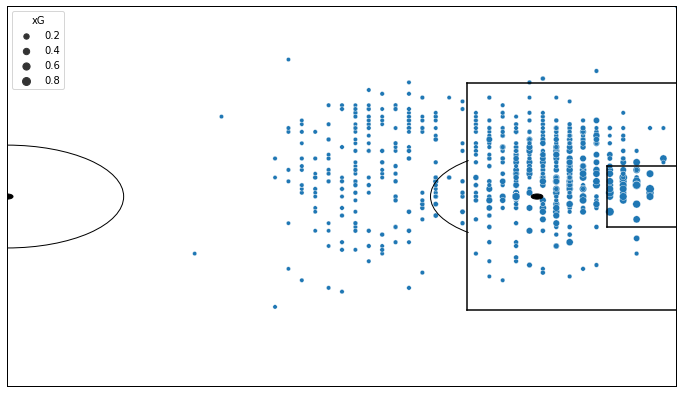

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Neymar"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

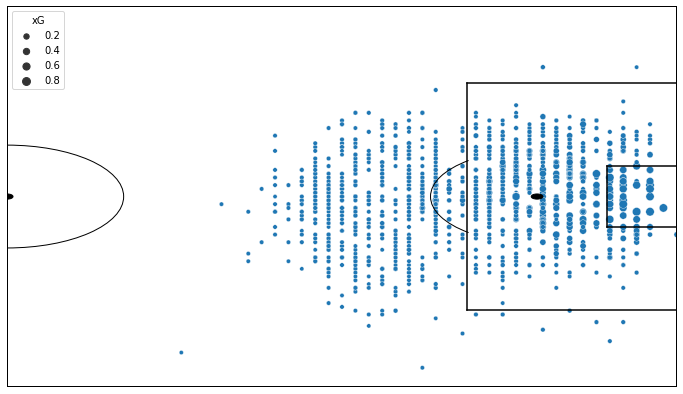

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

## Plot HeatMaps

(0.0, 0.74)

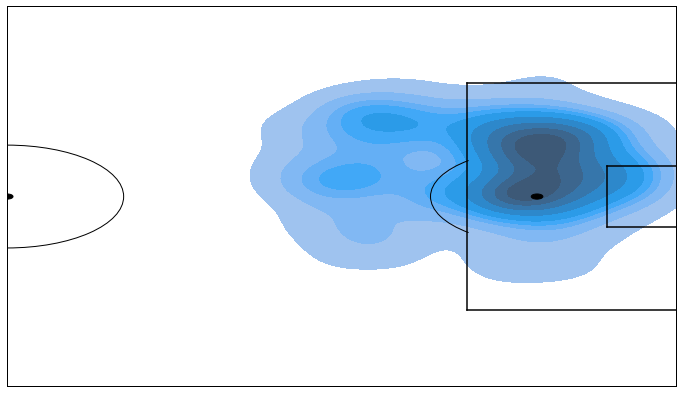

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Neymar"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

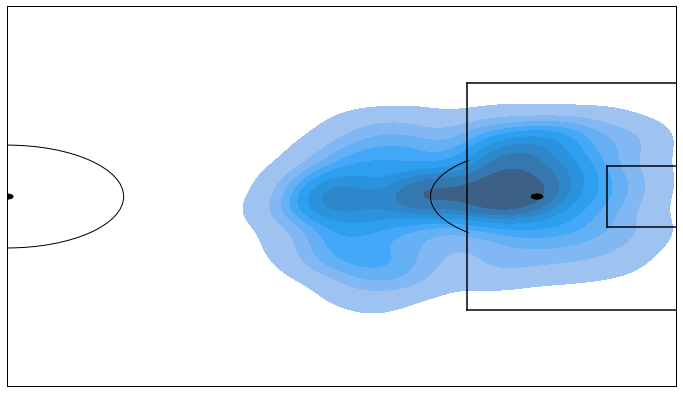

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# The Final Comparison

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Neymar,FWL,1,1,2,90,0.19,3,1.52,6,2022,Paris Saint Germain,0,0,1,0.19,1.34,0.42
1,Neymar,FWL,22,13,54,1877,11.74,6,8.74,61,2021,Paris Saint Germain,10,0,10,8.70,25.09,12.04
2,Neymar,FWL,18,9,70,1413,13.25,5,7.52,58,2020,Paris Saint Germain,5,2,4,8.69,21.54,9.85
3,Neymar,AMC,15,12,70,1325,14.73,6,5.25,38,2019,Paris Saint Germain,2,1,8,10.92,21.30,7.21
4,Neymar,FW,17,15,55,1443,11.90,7,7.78,43,2018,Paris Saint Germain,2,0,10,8.10,18.17,6.62
5,Neymar,FWL,20,19,91,1797,16.54,13,12.28,70,2017,Paris Saint Germain,4,1,15,13.50,31.43,11.52
6,Neymar,FWL,30,13,105,2652,14.18,11,10.67,91,2016,Barcelona,6,1,12,13.43,30.41,12.35
7,Neymar,FWL,34,24,124,3058,28.05,12,18.07,102,2015,Barcelona,6,0,19,22.85,52.41,22.22
8,Neymar,Sub,33,22,95,2573,22.72,7,8.26,52,2014,Barcelona,6,0,21,21.98,36.89,11.68
0,Messi,FW,1,2,6,90,1.99,1,0.92,4,2022,Paris Saint Germain,0,0,2,1.99,2.92,0.61


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,270,239,1339,22769,204.23,111,115.49,663,18162,27,0,211,175.22,328.89,133.75
1,Neymar,190,128,666,16228,133.30,70,80.09,521,18162,41,5,100,108.36,238.58,93.91


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG', 'assists', 'xA', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

## Radar Plot for Comparison Analysis

In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Neymar"), cols_for_radar].values.flatten(), 
                              theta=cols_for_radar, fill='toself', name='Neymar'))
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(), 
                              theta=cols_for_radar, fill='toself', name="Messi"))
# Additional properties for the plot:
fig.update_layout(title="Neymar vs Messi", polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

## Per90 Stats

In [ ]:
per90Cols = ['goals', 'shots', 'xG', 'assists', 'xA', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
  radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.944706,5.292723,0.807269,0.438754,0.456502,2.620668,0.834029,0.692600,1.300018,0.528679
1,0.709884,3.693616,0.739278,0.388218,0.444177,2.889450,0.554597,0.600961,1.323158,0.520822


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Neymar"), cols_for_radar].sum(),
             theta=cols_for_radar, fill='toself', name='Neymar'))
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
            theta=cols_for_radar, fill='toself', name="Messi"))
# Additional properties for the plot:
fig.update_layout(title="Neymar vs Messi", polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

# Who has more goals Lionel Messi or Junior Neymar?

Messi has played more number of match than neymar if we see per match Goal comparision than messi has slight edge over Neymar

# Who has assisted best?

Even though Messi is big name in the world of Football but stats shows that Neymar assisted his team better compare to messi

# Summary

Looking  all statistical values I believe that Lionel Messi is the better player at the moment.